In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

In [2]:
DT = pd.read_excel("Data_Train.xlsx")

In [3]:

DT.shape 

(6019, 12)

In [4]:
DT.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

In [7]:
#Minimun number of seats is ZERO which not possible in any type of car

In [8]:
DT.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [9]:
DT['Power']

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 6019, dtype: object

In [10]:
#Converting the data type of required coloumns into float type for further calculation
import numpy as np
#power
DT.loc[DT.Power=='null bhp','Power'] = np.nan
DT[DT.Power =='null bhp'].Power.head(3)

DT['Power'] = DT.Power.str.replace('bhp','')
#DT.head()
DT['Power']= DT.Power.astype(float)

#Engine
DT['Engine'] = DT.Engine.str.replace('CC','')
#DT.head(2)
DT['Engine']  = DT.Engine.astype(float)
#DT.dtypes

#mileage
mileage = DT.Mileage.str.replace('km/kg','kmpl')
DT['Mileage'] = mileage
milg = DT.Mileage.str.replace('kmpl','')
DT['Mileage'] = milg
#DT.head(2)

DT['Mileage'] = DT.Mileage.astype(float)

DT.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [11]:
 DT.head(4)

Name Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG   Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option     Pune  2015              41000   
2                      Honda Jazz V  Chennai  2011              46000   
3                 Maruti Ertiga VDI  Chennai  2012              87000   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  
0       CNG       Manual      First    26.60   998.0   58.16    5.0   1.75  
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0  12.50  
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   4.50  
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   6.00

In [12]:
#Finding the mean of coloums having 'NUll' or 'NaN' values
print('meanEngine = ',DT.Engine.mean())
print('meanPower = ',DT.Power.mean())
print('meanMileage = ',DT.Mileage.mean())
print('meanSeats= ',DT.Seats.mean())

meanEngine =  1621.276449941501
meanPower =  113.25304969366915
meanMileage =  18.134960943992024
meanSeats=  5.278735151413753


In [13]:
#filling the 'Null' or "NaN" having coloumns by that particular coloumn's mean value
DT['Engine'].fillna(value = 1621.27644,inplace =True)
DT['Power'].fillna(value =  113.2530,inplace =True)
DT['Mileage'].fillna(value = 18.13496,inplace =True)
DT['Seats'].fillna(value = 5,inplace =True)

#Checking if there is any null values left to fill
DT.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [14]:
#Checking the changes in the mean value of columns after filling the 'NaN' values
print('meanEngine = ',DT.Engine.mean())
print('meanPower = ',DT.Power.mean())
print('meanMileage = ',DT.Mileage.mean())
print('meanSeats= ',DT.Seats.mean())

meanEngine =  1621.27644988204
meanPower =  113.25304851304202
meanMileage =  18.13496094367835
meanSeats=  5.2767901644791495


In [15]:
#checking for duplicate rows
DT.duplicated().sum()

np.int64(0)

In [16]:
#Storing the index values of rows for those coloumns having '0' values
zero_val_milg = DT[DT.Mileage==0].index.tolist()
zero_val_pow = DT[DT.Power==0].index.tolist()
zero_val_seat =DT[DT.Seats==0].index.tolist()
zero_val_eng = DT[DT.Engine==0].index.tolist()

In [17]:
#Droping the rows that have '0's' in obivious coloumns
DT.drop(labels =zero_val_milg ,inplace =True)
#DT.drop(labels =zero_val_pow ,inplace =True)
DT.drop(labels =zero_val_seat ,inplace =True)
DT.drop(labels =zero_val_eng ,inplace =True)

In [18]:
DT.shape

(5950, 12)

In [19]:
DT.describe()

Year  Kilometers_Driven      Mileage       Engine        Power  \
count  5950.000000       5.950000e+03  5950.000000  5950.000000  5950.000000   
mean   2013.406555       5.856363e+04    18.343501  1619.695615   113.120496   
std       3.220781       9.165973e+04     4.173887   597.264498    53.341649   
min    1998.000000       1.710000e+02     6.400000    72.000000    34.200000   
25%    2012.000000       3.390450e+04    15.300000  1198.000000    77.000000   
50%    2014.000000       5.300000e+04    18.200000  1493.000000    98.600000   
75%    2016.000000       7.297725e+04    21.100000  1968.000000   138.030000   
max    2019.000000       6.500000e+06    33.540000  5998.000000   560.000000   

             Seats        Price  
count  5950.000000  5950.000000  
mean      5.279664     9.456319  
std       0.803279    11.138390  
min       2.000000     0.440000  
25%       5.000000     3.500000  
50%       5.000000     5.650000  
75%       5.000000     9.915000  
max      10.000000   160.000000

In [20]:
#NOTE :- Mininum number of seats are not zero can be see from above aggregationb

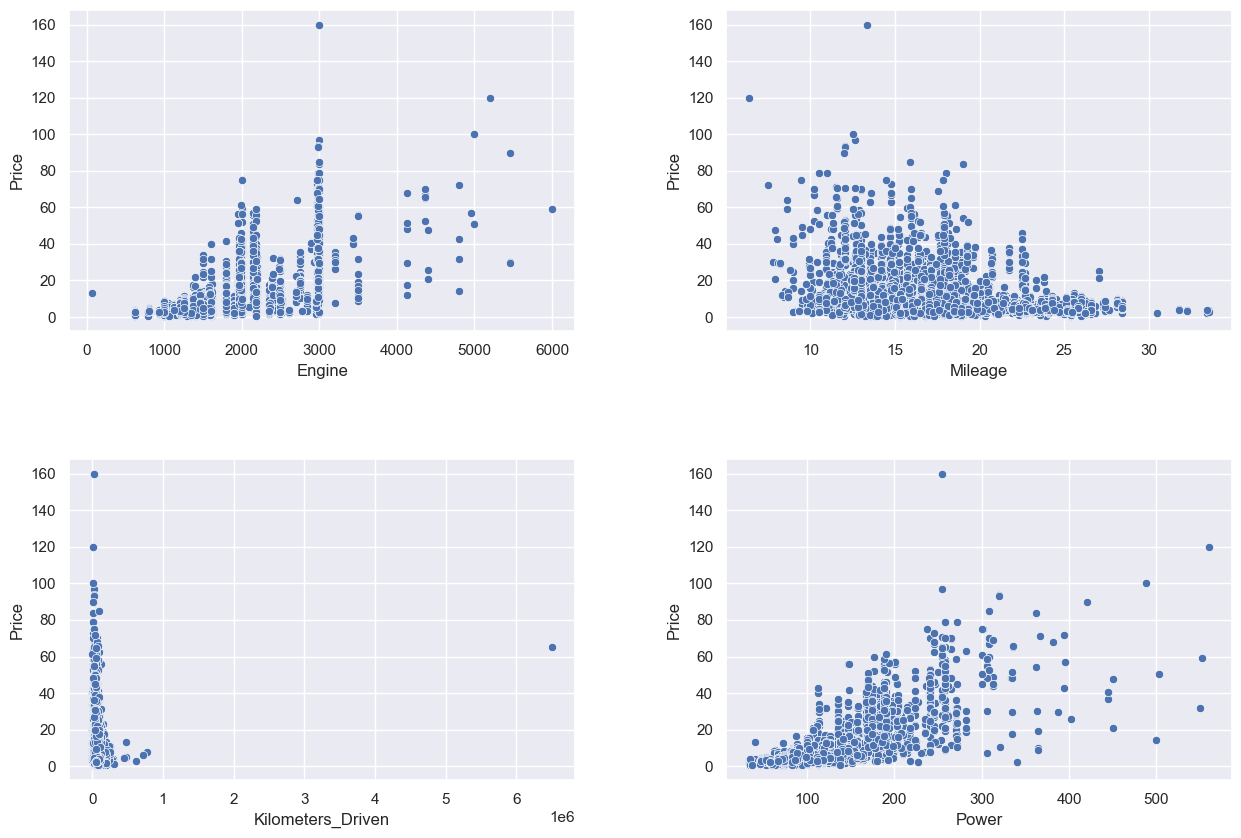

In [21]:
fig = plt.figure(figsize = (15,10))

fig.subplots_adjust(hspace = 0.4, wspace =0.3)
plt.subplot(2,2,1)
sns.scatterplot(x = 'Engine',y = 'Price',data = DT)

plt.subplot(2,2,2)
sns.scatterplot(x = 'Mileage',y = 'Price',data = DT)

plt.subplot(2,2,3)
sns.scatterplot(x = 'Kilometers_Driven',y = 'Price',data = DT)

plt.subplot(2,2,4)
sns.scatterplot(x = 'Power',y = 'Price',data = DT)

plt.show()

In [ ]:
#Exploratory Analysis of our datasheet : -

In [22]:
#Brand is the new coloumn containing only the Brand Name of cars#
DT['Brand'] = DT.Name.str.split().str.get(0)
DT.head(5)

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  \
0       CNG       Manual      First    26.60   998.0   58.16    5.0   1.75   
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0  12.50   
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   4.50   
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   6.00   
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0  17.74   

     Brand  
0   Maruti  
1  Hyundai  
2    Honda  
3   Maruti  
4     Audi

In [24]:
#Finding the relation between 'Price' and the independent variables.

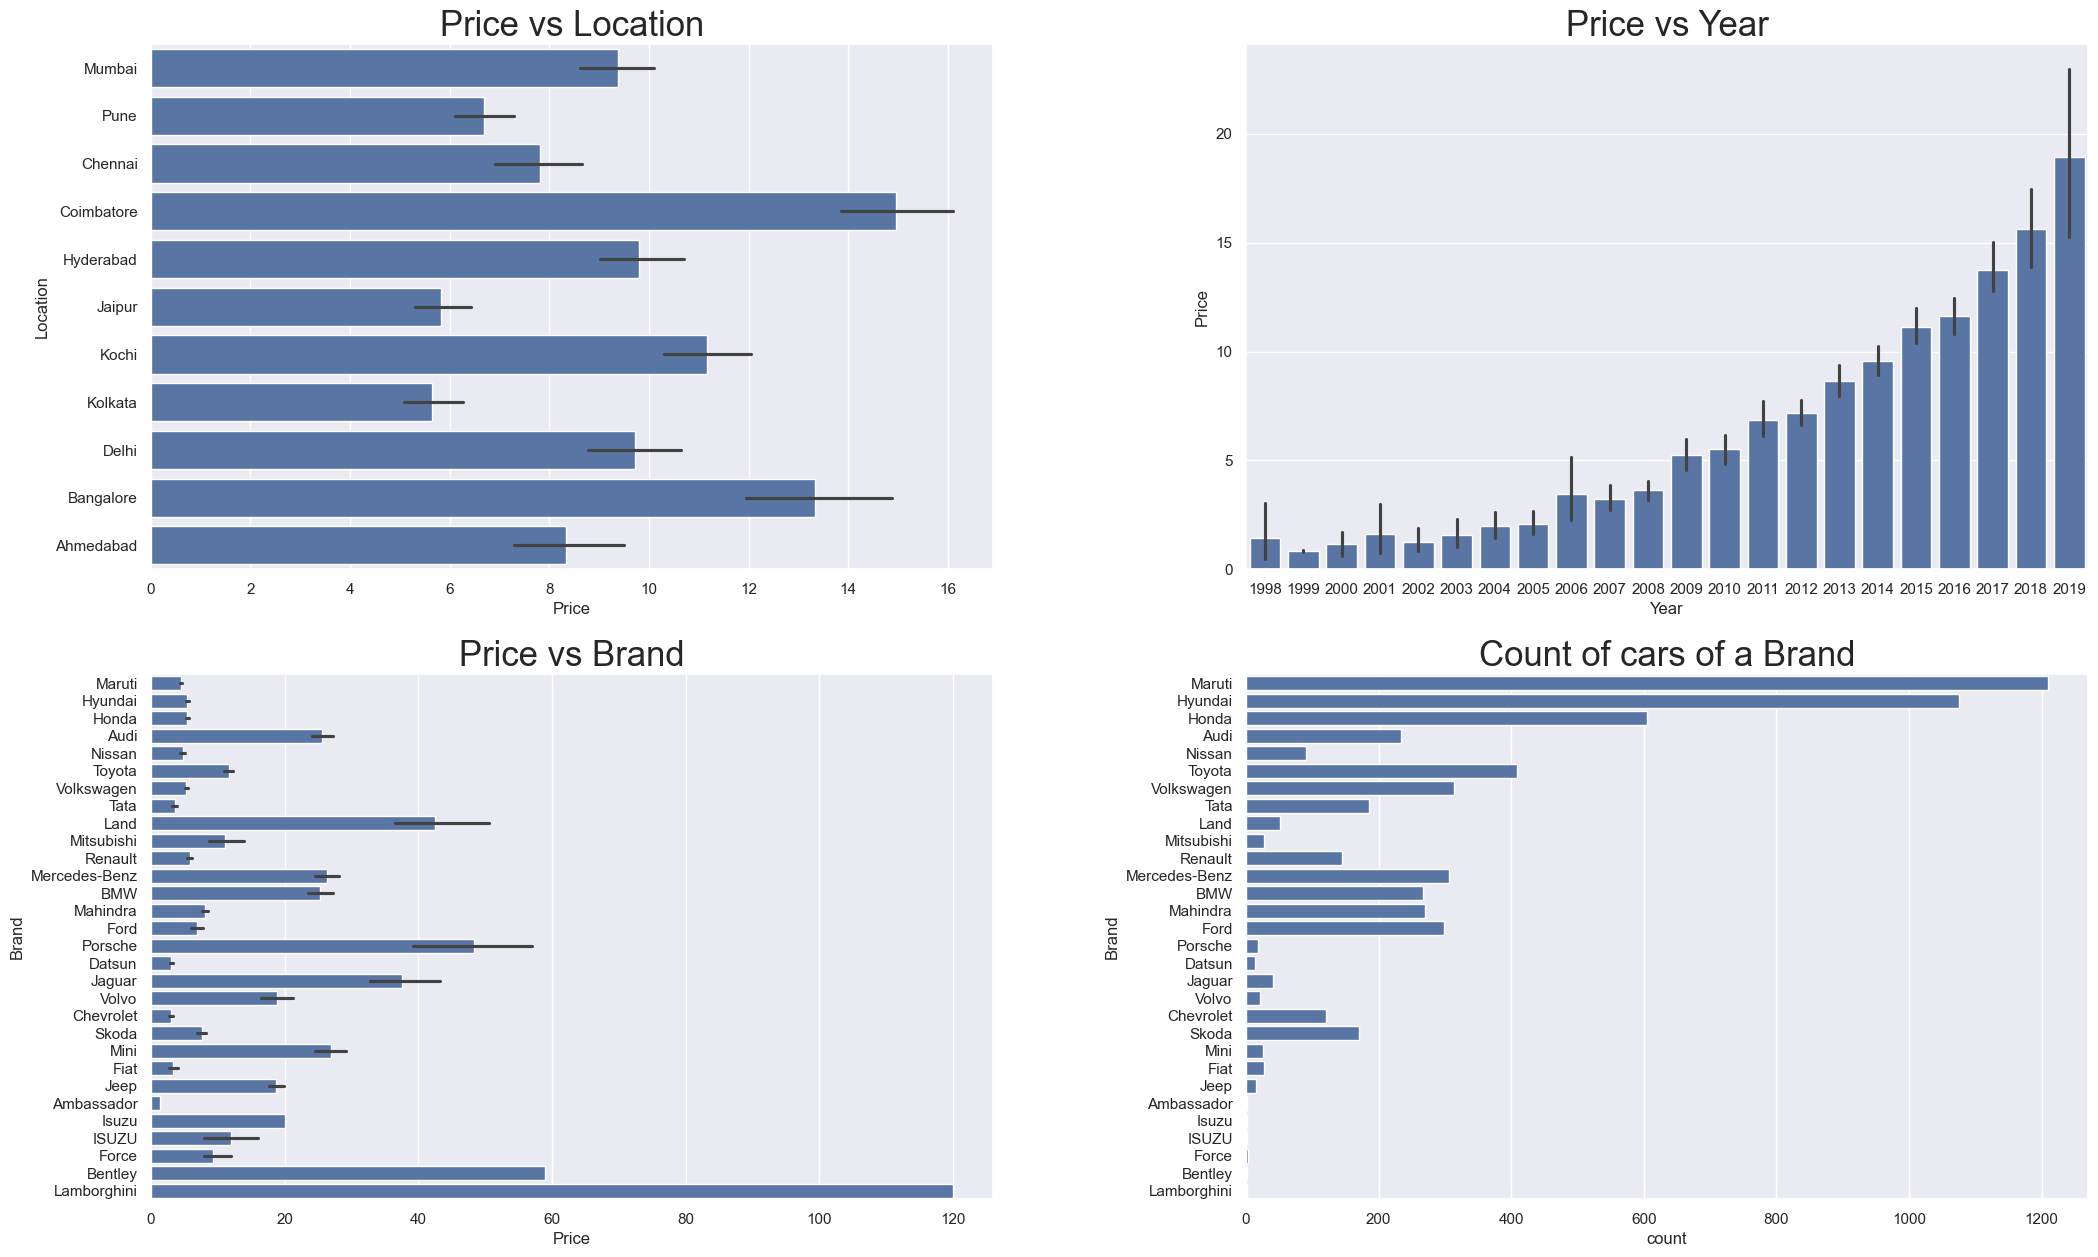

In [25]:
import seaborn as sns

fig = plt.figure(figsize = (25,15))

fig.subplots_adjust(hspace = 0.2, wspace =0.3)
plt.subplot(2,2,1)
#Relation between Price and location
sns.barplot(x = 'Price', y ='Location', data  = DT)
plt.title('Price vs Location',fontsize  =25)

#Relation between Price and year
plt.subplot(2,2,2)
sns.barplot(x ='Year', y ='Price', data  = DT)
plt.title('Price vs Year',fontsize  =25)

#Relation between Price and Brand
plt.subplot(2,2,3)
sns.barplot(x = 'Price', y ='Brand', data  = DT)
plt.title('Price vs Brand',fontsize  =25)

#Counting the which brand have most number of cars in our datasheet 
plt.subplot(2,2,4)
sns.countplot(y ='Brand', data  = DT)
plt.title('Count of cars of a Brand',fontsize  =25)

plt.show()

In [27]:
#INFERENCE :-

#1.Price of cars are highest in Coimbatore and Banglore while lowest in Jaipur and kolkata.

#2.The Price of cars increases gradually year by year except the price drops slightly in year 2007

#3.The Highest price of car is Lamborghini and lowest price of car is Maruti and thus the highest number of cars owned by people is of brand Maruti and hardly two car is owned of brand lamborghini by people.

#4.While Mercedenz-Benz and BMW cars are owned by moderate amount of people despite of their high prices.

#NOTE :- We can say that the lesser the price of a car then it is more likely to be bought by people.

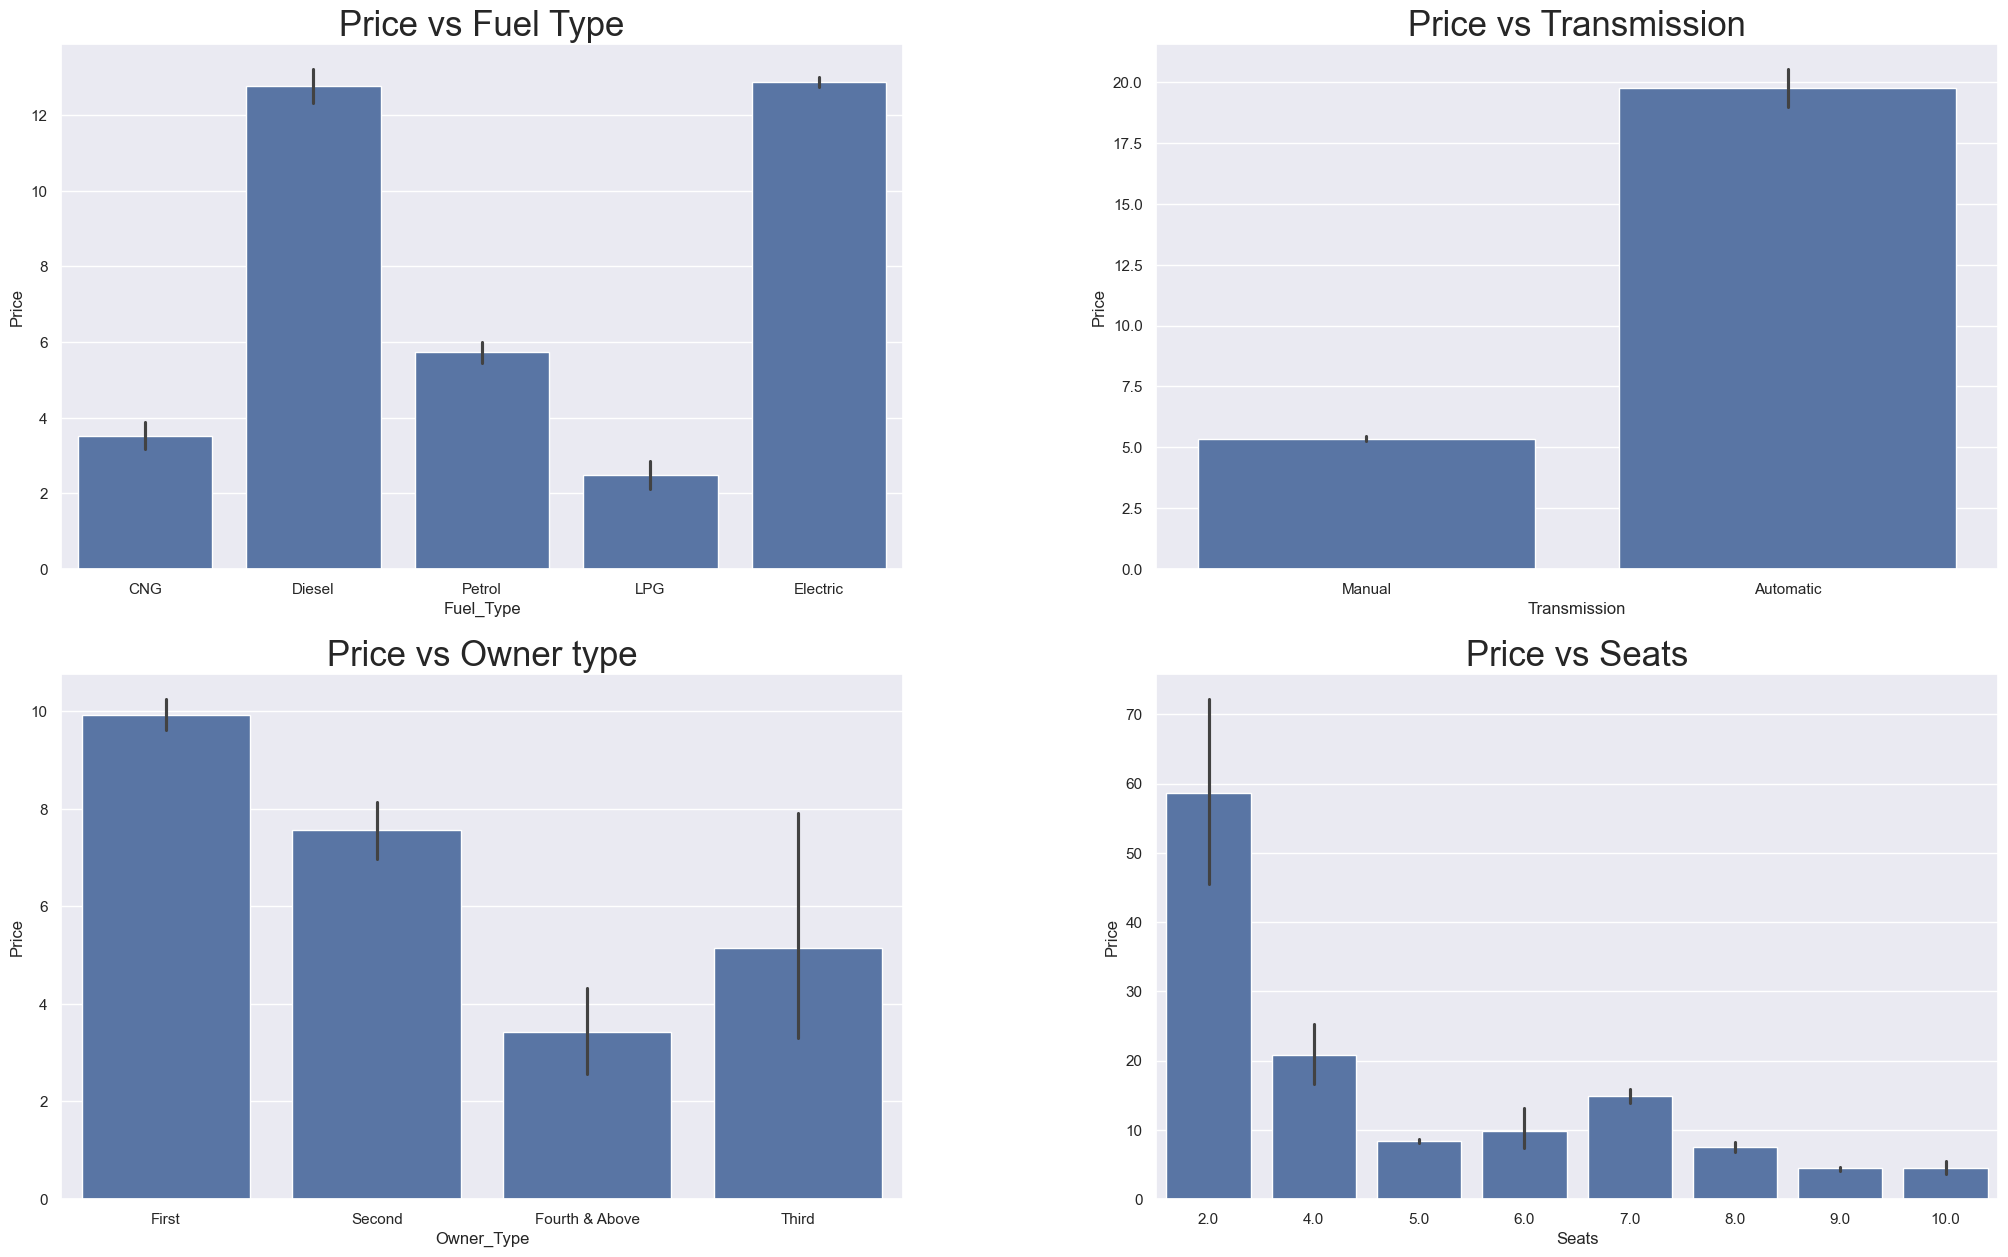

In [28]:
import seaborn as sns

fig = plt.figure(figsize = (25,15))

fig.subplots_adjust(hspace = 0.2, wspace =0.3)
plt.subplot(2,2,1)
#Relation between Price and Fuel type
sns.barplot(x = 'Fuel_Type', y = 'Price', data  = DT)
plt.title('Price vs Fuel Type',fontsize  =25)

#Relation between Price and transmission
plt.subplot(2,2,2)
sns.barplot(x ='Transmission', y ='Price', data  = DT)
plt.title('Price vs Transmission',fontsize  =25)

#Relation between price and owner type
plt.subplot(2,2,3)
sns.barplot(x ='Owner_Type', y ='Price', data  = DT)
plt.title('Price vs Owner type',fontsize  =25)

#Relation between price and seats
plt.subplot(2,2,4)
sns.barplot(x ='Seats', y ='Price', data  = DT)
plt.title('Price vs Seats',fontsize  =25)

plt.show()

In [29]:
#INFERENCE :-

#1.According to our datasheet price of Diesel and Electric type of cars is highest below that price is Petrol type cars.while CNG and LPG car type prices are lowest.
#2.Cleary from graph of Price vs Transimission Automatic cars have higher prices than Manual type.
#3.As the number of owner of a car increases the price of that car decreases.
#4.Two seater cars has the Highest prices and as the seats increases in cars the prices decreases.
#NOTE :- Condition for high price car :-

#1.Should be diesel or electric.
#2.Automatic in trasmission.
#3.Should be a New car or atleats a second-hand car.
#4.Should have Least number of seats.